# A crash course on parameter estimation of computational models using a Bayesian optimization approach

## Learning objectives

By going through this learning module, you will be able to:

* Understand the concept and necessity of parameter estimation in science and engineering
* Describe what the whole process of Bayesian optimization is all about
* Define and implement a Bayesian optimization workflow for parameter estimation of common use-cases 
* Critically evaluate the output of the process and fine-tune the setup of the Bayesian optimization
* Apply the obtained knowledge to any kind of models that are commonly used in science and engineering

## Introduction

As the name implies, the parameter estimation process deals with approximating unknown parameters, the factors that define a system or its operation. In science and engineering, this can be seen as a sub-category of optimization techniques since we seek to find the optimal state of a system. After finding the desired state, we look for the parameters contributing to such a state. It is indeed what parameter estimation is all about. Seems complex? Look at it as a calibration process, in which a machine, tool, or system is tuned to produce a correct output. Imagine you want to calibrate a machine with 3 knobs. How do you do the calibration?  You compare the output with a reference, something you know the machine should produce, and then try to adjust the knobs such that the output matches the reference. It is how calibration works, no? Take a thermometer as an example. You have a reference temperature, like boiling water at 100 degrees Celsius, and 3 knobs on the device. You continue turning the knobs to see 100 appearing on the machine, and by doing that, you calibrate the thermometer. In this way, you have estimated the unknown parameters (the 3 knobs) of the device. After being calibrated,  you can use the thermometer to measure any temperature.

Now, instead of the machine, assume you want to perform the same process on an engineering system. Each system (or, let's say, model) has a certain number of parameters to be tuned. After calibrating the system (model) with the reference data (a data we already know is correct), we can assure that the system's output is more or less valid if being used for another measurement (prediction). Real-world systems in science and engineering contain some parameters that cannot be obtained directly from published scientific materials or experimental studies. Thus, we should estimate them using a calibration (optimization) strategy, a process that is generally called an inverse problem.

Take a simple reaction-diffusion system as an example, in which the change of concentration of sample chemical component $C$ is studied over time. By assuming that the correlated chemical reaction is $ A + 2B \rightleftharpoons C$, occurring in a diffusible medium (such as a chemical solution), a partial differential equation (PDE) can be used to describe the mass transfer phenomenon over time:

$$ \frac{\partial [C]}{\partial t} = \nabla . \left( D_C \nabla [C] \right) + k_1 [A][B]^2 - k_2 [C] $$

in which $[X]$ denotes the concentration of the chemical component $X$, $ D_C $ is the diffusion coefficient of C in the medium, and $k_1$ and $k_2$ are the rates of the forward and backward reactions, respectively. To solve this PDE and get quantitative data (which is the goal of lots of engineering projects), we need to know the value of $ D_C $, $k_1$, and $k_2$. The diffusion coefficient of different materials can be found in the literature (although it does not necessarily mean that the value is suitable for any kind of problem), but the reaction rates are rarely known for a wide variety of chemical reactions. As a result, by simulating this model, we cannot produce quantitative output. 

As mentioned above, one solution is making an inverse problem out of this challenge. An inverse problem in science is usually referred to the process of calculating the causal factors from a set of observations that have produced them. Inverse problems are important because they tell us about parameters that we cannot directly observe. That's exactly what we want to do: estimating parameters that we cannot directly measure for our model. Indeed, we calibrate our model to act similarly to available experimental data, and then this calibrated model can be used to simulate other scenarios that we have not tested in experiments. This concept is similar to the training process of machine learning models. You train the model by making it fit to previously available data and asking it to predict unseen data.

To construct an inverse problem for computational models, we can take advantage of conventional optimization approaches. The goal is to minimize or maximize a function, or more technically speaking, an objective function. Mathematical optimization is selecting the best element (concerning some criterion) from some set of available alternatives.  In the simplest case, an optimization problem consists of maximizing or minimizing an objective function by systematically choosing input values from an allowed set and computing the output of the system. More generally, optimization is the process of finding the optimum value of an objective function given a defined domain (or input). To wrap up, the essential concepts here are the objective function (what we want to minimize) and the domain space (values of the parameters over which we minimize the objective).

Back to our example problem, our objective function will be the difference between the produced output of our simulation and the experimental data of the exact condition, which is also called "loss". In other words, we change the coefficients such that the simulation output would be the same as (or close to) the experimental data that we already have. To this end, we can choose random values out of the domain space (the range that we search for appropriate values), evaluate the model with those values, and continue this process till we find the lowest loss possible. This can be a good approach as long as the cost function evaluation is cheap, which means the simulations run fast (because we need to run the simulation to evaluate the cost function). The problem is, for most of the real-world models, running each simulation takes quite long. As a result, each iteration of the optimization algorithm is not cheap anymore. To overcome this issue, we use a Bayesian optimization strategy, a method that is usually employed to optimize expensive-to-evaluate functions.

## Bayesian optimization

To describe how the Bayesian optimization approach helps us to overcome the problem mentioned above, I use the great description made by @WillKoehrsen. I can't explain it better (you can find the full interactive document [here](https://github.com/WillKoehrsen/hyperparameter-optimization/blob/master/Introduction%20to%20Bayesian%20Optimization%20with%20Hyperopt.ipynb)):


*Evaluating the objective function is the expensive part of optimization, so ideally, we want to limit calls to this function. One way we can limit calls is by choosing the next values to try in the objective function based on the past results. Bayesian optimization differs from random or grid search by doing exactly this: rather than just selecting from a grid uninformed by past objective function evaluations, Bayesian methods take into account the previous results to try more promising values. They work by constructing a probability model of the objective function (called a surrogate function) $p(\text{score} | \text{parameters})$ which is much easier to optimize than the actual objective function. $p (A\mid B)$, the conditional probability, is the probability of A given B, i.e., A after B is observed.*

*After each evaluation of the objective function, the algorithm updates the probability model (usually given as $p(y | x)$ incorporating the new results. [Sequential Model-Based Optimization (SMBO) methods are a formalization of Bayesian optimization](https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f) that updates the probability model sequentially: every evaluation of the objective function with a set of values updates the model with the idea that eventually the model will come to represent the true objective function. This is an application of Bayesian Reasoning. The algorithm forms an initial idea of the objective function and updates it with each new piece of evidence.*

*The next values to try in the objective function are selected by the algorithm optimizing the probability model (surrogate function), usually with a criterion known as Expected Improvement. Finding the values that will yield the greatest expected improvement in the surrogate function is much cheaper than evaluating the objective function itself. By choosing the next values based on a model rather than randomly, we hope that the algorithm would converge to the true best values much quicker. The overall goal is to evaluate the objective function fewer times by spending a little more time choosing the next values. Overall, Bayesian Optimization and SMBO methods:*

* *Converge to a lower score of the objective function than random search*
* *Require far less time to find the optimum of the objective function*

*So, we get both a faster optimization and a better result. These are both two desirable outcomes, especially when we are working with heavy computational models!*


According to this simplified description, Bayesian optimization is a great candidate to perform the parameter estimation of PDE-based computational models. If you are interested to know more about the mathematical aspects of the Bayesian optimization, you may have a look at [this short guide](https://app.sigopt.com/static/pdf/SigOpt_Bayesian_Optimization_Primer.pdf). 

In this notebook, we implement the whole process of a Bayesian optimization strategy, including constructing a cost function by calling the simulation code, performing the optimization, and postprocessing the results. To do this, we use Python and HyperOpt, an open-source Python library for Bayesian optimization that implements SMBO using the Tree-structured Parzen Estimator (TPE). TPE, along with Gaussian Processes and Random Forest Regression, are the algorithms that can be used in the SMBO method to construct the probability model (surrogate function). We don't need to worry about implementing the algorithm because Hyperopt takes care of that for us. We have to make sure we have correctly defined the objective function and the domain of values to search over.

## Sample problem

### Fitting a 4th-order polynomial equation 

Instead of a PDE model, we use a more straightforward problem to focus more on the optimization rather than the numerical simulation of the PDE. The problem with which the optimization algorithm interact is fitting a 4th-order polynomial equation on some experimental data. You should notice that the optimization algorithm is entirely unaware of the fitting problem behind the objective function. 

The objective function is implemented in a general way: calling the external simulation code, gathering produced output, and computing the loss. To make this as real-world as possible, I implemented an external Python code that takes polynomial coefficients and computes the function values on desired points. This data is saved on the disk and then retrieved by the objective function of the main optimization code to calculate the loss. In a real-world application, the external simulation code takes the coefficients (such as the reaction rates in the above PDE example), performs the simulation, and writes the output to the disk. The rest of the process is the same. In the next step, the optimization algorithm changes the parameters and calls the external simulation code again to see the loss of the new parameters. This process continues iteratively to a certain number of iterations.

The experimental data, which are indeed 21 points of a 4th-order polynomial function in the range $[0, 5]$, are stored in a csv file. Each line contains one point, better to say a pair of two values defining a point, and this exactly what it can be in a real scenario. For example, it can contain the value of a chemical component concentration over time, in which the first and second values of each line would be time and concentration, respectively. The stored data can be plotted using the Matplotlib library.  

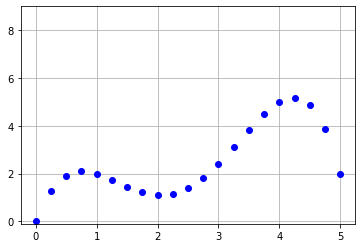

In [1]:
import matplotlib.pyplot as plt

x = []
y = []
with open("data.csv", 'r') as f:
    lines = f.readlines()
    for item in lines:
        x.append(float(item.split(',')[0]))
        y.append(float(item.split(',')[1]))

plt.plot(x, y, 'bo')
plt.ylim(-0.1, 9)
plt.grid(True)
plt.show()

The general 4th-order polynomial equation is:

$$ f(x) = c_4 x^4 + c_4 x^3 + c_2 x^2 + c_1 x + c_0 $$

As it should be clear till now, the whole story is to find the coefficients $[c_0 ... c_4]$. From the data, we already know that the equation should pass through the origin $ (0, 0) $, so it can be simplified to:  

$$ f(x) = c_4 x^4 + c_4 x^3 + c_2 x^2 + c_1 x $$

which results in 4 unknown parameters instead of 5. The goal of the optimization algorithm is to find these four parameters. Before going through the steps that we should take to do this, let's first have a look at the correct values of these parameters. The correct values are:

$$ c_4 = -0.25, c_3 = 2.35, c_2 = -6.75, c_1 = 6.65 $$

We can check these coefficients simply by using the `poly1d` function of the Numpy package.


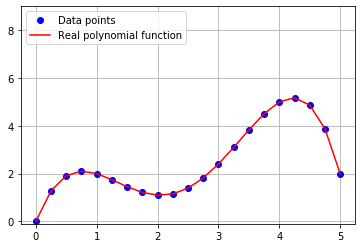

In [2]:
import numpy as np

f = np.poly1d([-0.25, 2.35, -6.75, 6.65, 0])

plt.plot(x, y, 'bo', label="Data points")
plt.plot(x, f(x), '-r', label="Real polynomial function")
plt.ylim(-0.1, 9)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

Please pay attention that we don't use this knowledge at all, and instead, we will use the Bayesian optimization algorithm to find these values. It is also worth noting that this problem is a bit more complex than the parameter estimation of typical PDE-based simulations. For PDE models, changing constant coefficients, such as reaction rates in the reaction-diffusion equation mentioned above, does not change the behavior of the system dramatically. Put differently, most of the time, the output of the simulation is qualitatively similar to the experimental data, and we need to calibrate the model using the specific search domains about which we already have some clue. In contrast, in the problem that we have here, changing the coefficients, especially the multiplier of the high order terms, greatly impacts the behavior of the polynomial function. This demonstrates that the problem we will analyze here is complex enough -- at least as complex as other cases with four unknown parameters.

### Simulating an external simulation program

As mentioned above, to make the optimization like a real scientific computing scenario, an external python code is implemented to perform the calculation of the 4th-order polynomial outside of the main optimization code. In each iteration of the optimization, the objective function code calls this external program, waits for it to complete its computation, and gathers its results. These results are then used to compute the loss of each iteration by comparing them to the experimental data.

There are several ways to communicate with external simulation codes, such as writing the parameters to the disk and ask the simulation code to read it or manipulating the input file of the simulation directly. However, if the simulation program is an in-house code developed by yourself and doesn't need any specific input file to work, the simplest method for passing the parameters will be the command line arguments. Although it doesn't seem so, making it happen in this way is simple. All you need to do is pass the parameters during the process of calling the program, and then by having a few lines of code, the simulation code can retrieve them. For example, the command to call the program can be like `python external.py arg1 arg2 arg3`, in which the arg1, arg2, and arg3 are the command line arguments.

If it still looks complicated, have a look at our external simulation program code, which is stored as external.py. The program reads the passed parameters and constructs a polynomial function. Then, it evaluates the constructed function on the range $(0, 5)$ (which should be the same range as our experimental data) and stores the result to the disk. The file name pattern of the output is "result-{Run Number}.txt", in which the "Run Number" is the iteration number of the leading optimization code that has been passed by the arguments as well. The passed parameters are also saved in the first line of the output to make the postprocessing more effortless. It is a good practice because it helps us know which parameters have caused the output by looking at the file.

The external.py program is:

```python
import sys
import numpy as np

# we expect 6 arguments (the first arg is always the program name)
# the next one is the run number, which is used to name the output files
# the last four args are the passed coefficients of the polynomial
if len(sys.argv) != 6:
    print("Not enough input parameters!")
    quit()

runNumber = sys.argv[1] # used to create the output filename
coefs = [float(arg) for arg in sys.argv[2:6]] # convert args from string to float
coefs.append(0) # we already know that the function pass through (0, 0)

func = np.poly1d(coefs) # create the main polynomial function using the passed args

x = np.linspace(0, 5, 21)
y = func(x) # evaluate the function on the range (0, 5)

f = open("output/result-{0}.txt".format(runNumber), 'w+')

# we write the passed four coefficients to the first line of the output
# it helps us to know which parameters have caused this output
firstLine = "".join([str(item) + " " for item in coefs])
f.write(firstLine + "\n")

# write each point in a separate line
for i in range(len(x)):
    f.write("{0} {1}\n".format(x[i], y[i]))

```

## Optimization procedure

### Implementation

Now everything is ready to dive into the optimization code. The first step, like any other Python project, is importing required packages. Here we need two sets of packages: the ones required for the optimization process and the ones we will use to postprocess the results and see the performance of the optimization process. The main package in the first set is HyperOpt, and as described above, it can be used to perform Bayesian optimization in Python projects. The two essential packages in the second set are Pandas and Seaborn, which are popular Python data processing packages, and here, we will use them to process the data produced by the optimization algorithm.

In [3]:
# packages required for optimization
import numpy as np
from hyperopt import hp, tpe, fmin
import os
import time

# packages required for post-processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

The experimental data (here called targets all over the code) are stored separately in a CSV file. Each line of this CSV file contains a pair of values, in which the first value is the time (or X-axis of the data), and the second one is the value of the variable of interest (or Y-axis of the data). Thus, we store these values in two separate lists.   

In [4]:
target_values = [] # target values. will be read from a CSV file
time_values   = [] # time of the target values. will be read from a CSV file

Now it's time to define some basic helper functions. The first function we need is a piece of code to denormalize values from the range of $[0, 1]$ to the desired range. Why do we need this? Normalizing values before performing optimization is usually highly recommended, and we do that as well. So the domain on which we perform a search to find proper value in this code is always $[0, 1]$, but the actual rate is something else (you will see how to define it shortly). To put it another way, the optimization algorithm sees the domain space of $[0, 1]$ for all the parameters, but in the end, we want to see the optimum values (that minimizes the cost function) in their actual range, so we need to denormalize the values. This function does that.    

In [5]:
def denormalize(name, value):
    """
    Denormalizes input from [0 1] based on the real range defined

    Parameters
    ----------
    name : string
        The name of the variable. should match the name in 'ranges'
    value : float
        The value to be denormalized

    Returns
    -------
    output : float
        Denormalized value
    """
    return value * (ranges[name][1] - ranges[name][0]) + ranges[name][0]

Before optimization, we read the target values (described above) from the CSV file and store them in appropriate containers (Python lists).

In [6]:
def read_targets():
    """
    Reads target values to be used in evaluating error of each optimization step.
    data should be in a csv file, two values per line: [time value]. this scheme
    can be modified easily.
    time_values: The list of first elements of each pair in each line of the csv file
    target_values: The list of second elements of each pair in each line of the csv file
    """
    time_values.clear()
    target_values.clear()
    
    with open("data.csv", 'r') as f:
        lines = f.readlines()
        for item in lines:
            time_values.append(float(item.split(',')[0]))
            target_values.append(float(item.split(',')[1]))

RMSE is the abbreviation of Root Mean Square Error and shows the difference (error) between two data sets. According to [Wikipedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation), "root-mean-square error (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed". What we minimize by the Bayesian optimization algorithm is the RMSE of predicted values of the model (external simulation program) and the experimental data (stored in the CSV file). This function computes RMSE of two sets, predictions and targets, by taking advantage of super simple Numpy vector analysis operations.

In [7]:
def rmse(predictions, targets):
    """
    Computes Root-Mean-Square Error of simulation output and target values.
    the input lists should have the same size.

    Parameters
    ----------
    predictions : np.array
        Simulation output values
    target : np.array
        Targets values obtained from external source file

    Returns
    -------
    output : float
        RMS error of two lists
    """
    return np.sqrt(((predictions - targets) ** 2).mean())

As the name of the following function suggests, it is the main function of the optimization process we want to perform: the objective function. HyperOpt calls this function in each iteration with a new set of input values (guessed values) and tries to minimize it, which is indeed minimizing the RMS error. Thus, it first calls a function to call the external simulation program with the passed (guessed) input parameters, and then, calculate the error with the help of `rmse` function.

In [8]:
def objective(input_dict):
    """
    Main objective function, constructed based on the RMS error between simulated values
    and target values. It first calls the simulation and then computes the
    error based on the generated output. This error is used to choose the next suggest of
    the design parameters.

    Parameters
    ----------
    input_dict : dictionary
        Current value of design paramters, determined by the bayesian algorithm

    Returns
    -------
    output : float
        RMS error of current evaluation of objective function
    """
    # names should match the names defined in 'space' variable
    output = call_external(input_dict['c4'], input_dict['c3'], input_dict['c2'], input_dict['c1'])
    return rmse(np.array(output), np.array(target_values))

The `call_external` function is responsible for calling the external simulation program, collecting the output, and passing it back to the objective function that has called it. This function should work in sync with the external simulation in a way that no error occurs. In each iteration of the optimization process, this function will be called once, so keeping track of the current iteration number can be done by having a counter (`iter_number` here) that increases in each function call. This iteration number is also passed to the simulation program to name the output file, making it easy to postprocess the results of the optimization because we then know to which iteration number the result file belongs. This function also stores the run time of each simulation calls in a text file (`time.txt`). Although we will not use this file in postprocessing and further steps, it can act as valuable debug information after the optimization is done.

In [9]:
iter_number = 0 # used to hold current optimization step in order to name output file

def call_external(c4, c3, c2, c1):
    """
    Calls the main simulation based on the input values and returns a list of
    simulation output. The list used to calculate the error of the objective
    function. In addition, this function records the runtime duration of
    each simulation into a text file (time.txt).

    Parameters
    ----------
    All the parameters we want to estimate. Here as an example, we have four parameters
    passed to the finite element code.

    Returns
    -------
    output : list
        A list containing all the output points of the performed simulation
    """
    global iter_number
    # the parameters are normalized. we should denormalized them first
    # any additional preprocessing can be performed here
    c4 = denormalize('c4', c4)
    c3 = denormalize('c3', c3)
    c2 = denormalize('c2', c2)
    c1 = denormalize('c1', c1)
    iter_number += 1
    start = time.time()
    # here is the main call to the external simulation. it can be any internal or external code,
    # but it should store the output in an expected manner that can be read by processData().
    # the following line is an example of passing the parameters using command line arguments,
    # but it can be done in any other method such as writing the parameters to a file and asking
    # the simulation code to read them.
    # os.system("mpirun -n 8 FreeFem++-mpi ff/mg_3D.edp -num {0} -k1 {1} -k2 {2} -dmg {3} -dcl {4} > output/output-{0}.txt".format(iterNumber, c4, c3, c2, c1))
    os.system("python external.py {0} {1} {2} {3} {4}".format(iter_number, c4, c3, c2, c1))
    # record elapsed time
    f = open("output/time.txt", "a+")
    f.write("run={0}: {1:.0f} seconds\r\n".format(iter_number, time.time() - start))
    f.close()
    # return simulation output values
    return process_data()

This function is the output of `call_external` function and reads and returns the simulation output. As was described before, the simulation program writes the passed parameters to the first line of the output file, so we should remember to skip the first line while the code iterates through the file. The second element of each pair in the following lines are the simulation output, and this function returns a list of these values.

In [1]:
def process_data():
    """
    Reads simulation output file according to the current optimization step number
    and returns the values as a list. The files' name pattern should be adjusted.
    The first line of the file is also ignored because it contains the current value
    of our parameters. The next lines should be a pair of [time value], so the second
    element of each line will be read to be used in evaluation of objective function.

    Returns
    -------
    output : list
        A list containing all the output points of the performed simulation
    """
    global iter_number
    items = []
    # adjust the file name pattern. here, each step is saved as result-{step}.txt
    # in our finite element code.
    with open("output/result-{0}.txt".format(iter_number), 'r') as f:
        lines = f.readlines()
        for item in lines[1:]: # ignoring the first line
            # reading the second element of each line. the first one is time
            items.append(float(item.split()[1]))
    return items

And finally, we define the function that does the main task of optimization with the help of previously defined function. `run_optimization` first resets the global `iter_number` variable (to be increased in each step in `call_external` function) and then defines the space variable according to the number and type of parameters (a list of possible types can be found in [Hyperopt Wiki](https://github.com/hyperopt/hyperopt/wiki/FMin)). As mentioned before, it is highly recommended to normalize search domain variables, and as a result, we define these space parameters in a normalized format (in the range of $[0,1]$). The optimization algorithm works with these ranges, but we denormalize these values for passing them to the external simulation program or during postprocessing.

The algorithm we used here is the TPE algorithm of Hyperopt, but it can be changed to a random search. Then, it is time to call `fmin` to minimize the objective function: it gets the objective function, search space, the algorithm type, and the maximum number of evaluations as the input and returns the minimum loss as the output (which we don't use because we calculate it later again using our custom postprocessor). It worth noting that in the way that we have implemented the whole optimization process, this call to `fmin` is interruptible, i.e., you can interrupt it at any time you found that the loss value is small enough.

In [11]:
def run_optimization():
    global iter_number 
    iter_number = 0 # reset optimization iteration number

    
    # the main search space. we use normalized and uniform values for all parameters,
    # but they can be any kind of supported spaces (such as choice or lognormal)
    # refer to (https://github.com/hyperopt/hyperopt/wiki/FMin) for more info on this.
    space = {'c4': hp.uniform('c4', 0, 1),
            'c3': hp.uniform('c3', 0, 1),
            'c2': hp.uniform('c2', 0, 1),
            'c1': hp.uniform('c1', 0, 1)}

    tpe_algo = tpe.suggest # it can be changed to stochastic random search

    read_targets()

    # max_evals should be tuned
    tpe_best = fmin(fn=objective, space=space, algo=tpe_algo,
                    max_evals=400, rstate= np.random.RandomState(55))

### Running the first round

OK, now we are ready to start the main adventure. We define the true range of variables and call the main optimization function. That's it. Let's do it by having some initial guess of the range of parameters. Please take notice that the name of the parameters should match the names we used all over the code. The Hyperopt displays the progress and the minimum loss on the screen for us.

In [12]:
ranges = {
    'c4': (-1, 1),
    'c3': (-3, 3),
    'c2': (-10, 10),
    'c1': (-10, 10)
}

run_optimization()

100%|██████████████████████████████████████████████████| 400/400 [01:17<00:00,  5.14it/s, best loss: 2.048954102790817]


Hooray. It seems that the implemented optimization process works pretty well. We now have the minimum loss only, so we should go to the results folder and extract the valuable information out of it. I mean, it is time to implement our custom postprocessing system.

### Postprocessing the results

We take advantage of pandas and seaborn packages to do this. Pandas will be used to create a dataframe of the optimization results to process them easier (it provides interfaces that you can work with your data in a way similar to a spreadsheet program such as Microsoft Excel). Seaborn will be used for plotting useful graphs that show the performance of the optimization algorithm. 

So let's start with the dataframe. `prepare_dataFrame` reads the simulation output files and puts them into a dataframe. It also calculates the RMSE error of each simulation (each row of the dataframe). Before doing this, it checks whether the length of the recorded data in the simulation output equals the expected size or not. But why is this check crucial when every simulation will write the expected number of output values? That's true, but the issue is the optimization algorithm is interruptible, and you can break it at any time, which means that the last simulation is in the middle of its work, and the number of written data points is not enough for the RMSE code to calculate the error. As a result, we should check the number of output points before going on. In the end, it sorts the dataframe by the error rate ascending, so the simulations with the least error will be on the top of the list.

In [13]:
def prepare_dataframe():
    """
    Extracts all the performed optimization steps (based on the saved simulation output
    files) and computes the error of each.

    Returns
    -------
    output : pandas dataframe
        A dataframe of all optimization steps ad their error and design parameter values
    """
    # defining the dataframe column names
    df = pd.DataFrame(columns = ['Run', 'c4', 'c3', 'c2', 'c1', 'Error', 'Output'])
    # assuming the output files are in 'output' directory with the pattern 'result-{}.txt'
    for file in os.listdir('output/'):
        if file.startswith('result-'):
            with open(f'output/{file}', 'r') as f:
                # run number is grabbed from the file name
                run = re.search('result-(.*).txt', file).group(1)
                # value of design parameters of each simulation are stored in first line
                values = f.readline().split(' ')
                # next lines are filled by saved time steps
                lines = f.readlines()
                output = []
                for item in lines:
                    output.append(float(item.split(' ')[1])) # second element of each line
                # if you interrupt the optimization, a simulation is also interrupted,
                # so we will end up with a simulation that has less time data points
                # than expected. so lets check every file
                if (len(output) == len(target_values)):
                    error = rmse(np.array(output), np.array(target_values))
                    # create a new row and append it to dataframe
                    df = df.append({'Run': int(run),
                                    'c4':float(values[0]),
                                    'c3':float(values[1]),
                                    'c2':float(values[2]),
                                    'c1':float(values[3]),
                                    'Output': output,
                                    'Error': error}, ignore_index=True)
                else:
                    print("Mismatch detected in the number of simulated data at run #{0}".format(run))
    df = df.sort_values(by=['Error']) # sort the dataframe based on the error
    return df

The next step is to visualize the results. We take advantage of the great features of matplotlib and seaborn libraries to do that. First, the result of the top 3 runs (best simulations by considering the RMSE error of the output) are plotted and compared with experimental data. The title of each graph shows the error and the value of parameters that resulted in such an output. You can increase the number of plotted graphs or even remove the `head` function call and uncomment the `plt.savefig` statement to generate the graphs of all simulations and save them in png file format. "Immersion time" and "Evolved hydrogen" are examples of real-world axes labels, so I keep them here to remind you to choose clear axes labels.

After this, we use seaborn `PairGrid` class to generate a clear pair-plot of the optimization process. This plot shows how the optimization algorithm has chosen the values of different parameters in different iterations. It compares the distribution of points 2 by 2 for the parameters, so for 4 parameters, the plot will have 4x4 graphs. We fill the pair-plot with 3 sets of different plots for the diagonal, upper, and lower part of the grid. The diagonal plots show the histogram of distribution for each parameter through the search domain clearly. Additionally, this function saves the whole prepared dataframe of all iterations to a CSV file and prints the best 10 runs to the screen.

In [14]:
def plot_results():

    read_targets()
    df = prepare_dataframe()

    # saving a separate plot for each optimization step in 'figs' directory.
    # every detail of the plots should be modified according to the application
    for index, row in df.head(n=3).iterrows():
        plt.plot(time_values, target_values, 'bo', label='Experimental data')
        plt.plot(time_values, row['Output'], '-r*', label='Computational data')
        plt.xlabel('Immersion time ($hour$)')
        plt.ylabel('Evolved hydrogen ($ml.cm^{-2}$)')
        # putting the parameters values on the top of the chart
        plt.suptitle('{:4s} {:3d}   {:7s} {:9.6f} \n{:4s} {:4.3f}   {:4s} {:4.3f}   {:4s} {:4.3f}   {:4s} {:4.3f}'
                     .format("Run:", row['Run'], "Error:", row['Error'], "c4:", row['c4'],
                             "c3:", row['c3'], "c2:", row['c2'], "c1:", row['c1']),
                     fontsize=14, fontweight='bold', ha='left', x=0.05)
        plt.ylim(-0.1, 15) # adjust y axis range
        plt.legend(loc='upper left')
        plt.grid(True)
        # plt.savefig(f"figs/fig-{row['Run']}.png", dpi=200)
        plt.show()
        plt.clf()

    # creaing seaborn pair plots for the search space parameters
    sns.set(style="ticks", color_codes=True)
    # p = sns.pairplot(df, vars=['c4', 'c3', 'c2', 'c1'])
    g = sns.PairGrid(df, vars=['c4', 'c3', 'c2', 'c1'])
    g = g.map_upper(plt.scatter, edgecolor="w")
    g = g.map_lower(sns.kdeplot, cmap="Blues_d")
    # g = g.map_diag(sns.kdeplot, shade=True)
    # g = g.map_diag(plt.hist, histtype="step", linewidth=3)
    g = g.map_diag(plt.hist)


    # we can adjust incorrect automatic axis limits here
    # p.axes[2,0].set_ylim(-0.001, 0.011)
    # g.axes[2,0].set_ylim(-0.001, 0.011)
    # g.axes[0,2].set_xlim(-0.001, 0.011)

    # printing the dataframe to the screen as well as a CSV file
    print(df.head(n=10).filter(regex="^((?!Output).)*$")) # exclude the output column
    df.to_csv('export_dataframe.csv', index = None, header=True)
    # plt.show()

Now the postprocessor is ready to show us how the optimization algorithm has approximated the parameter values for the defined simulation problem. Let's not waste time and run it.

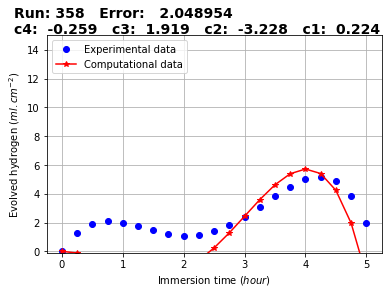

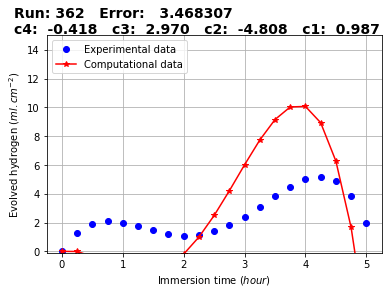

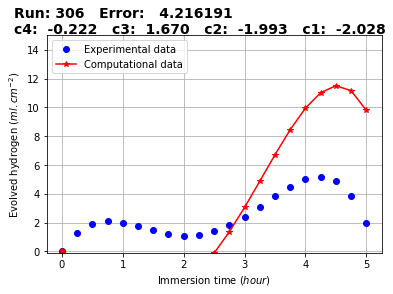

     Run        c4        c3        c2        c1     Error
287  358 -0.259164  1.919060 -3.228228  0.223635  2.048954
292  362 -0.418201  2.970484 -4.808315  0.986627  3.468307
230  306 -0.222391  1.670011 -1.993079 -2.028418  4.216191
254  328 -0.210934  1.014049  0.633036 -2.126461  4.778573
209  288 -0.138794  0.438353  1.615128 -4.352323  5.405204
143  228 -0.416089  2.979181 -5.760993  2.688568  5.912443
176  258 -0.121715  1.384271 -3.119067 -1.782400  6.255445
293  363 -0.433945  2.446476 -2.266312 -0.102711  7.590605
205  284 -0.138899  0.449779  0.877078 -2.625755  8.349608
65   158  0.080789 -0.415663  1.987595 -3.648817  8.837695


<Figure size 432x288 with 0 Axes>

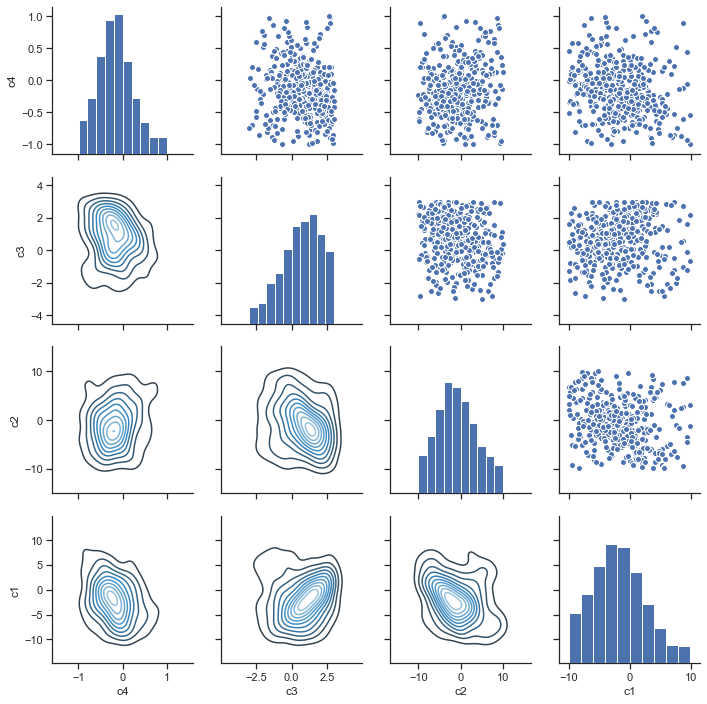

In [15]:
plot_results()

### Tune the parameters and start the second round

Cool. Although even the best simulation is not close enough to a good approximation, this initial parameter estimation has given us some good clues about a narrower range of search. This is the most important part of the process: choosing the next range for parameters. For doing this, you should have a critical look at the best runs, which reveals a narrower search space for each parameter. We have simulated the model (the external code) 400 times, so for 4 parameters, we have had enough runs to make a conclusion. Please notice that you you should never hurry to narrow the ranges as it may end up  with a wrong value for some of the parameters. You should also pay attention to the behavior of the curves. In some cases, the curves also help you know the  system's behavior when a specific parameter changes. Let's have a look at the top 10 runs (which are sorted by the lowest error): it seems that we can limit our search space to the following values, no? 

In [16]:
ranges = {
    'c4': (-0.5, 0.5),
    'c3': (0, 3),
    'c2': (-10, 0),
    'c1': (-7, 7)
}

run_optimization()

100%|█████████████████████████████████████████████████| 400/400 [01:18<00:00,  5.10it/s, best loss: 1.3675685895586316]


And after that, we run the postprocessor to see the performance of parameter estimation.

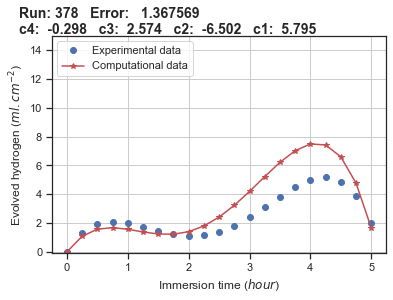

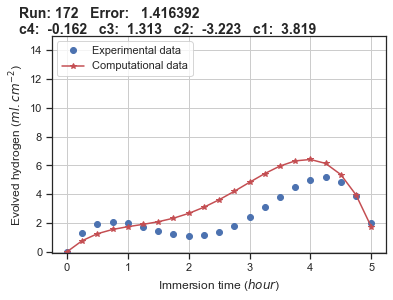

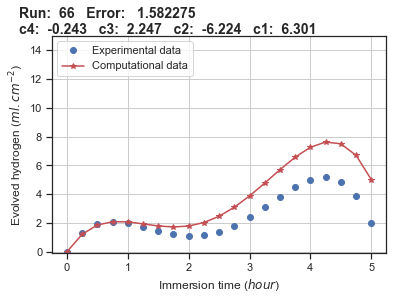

     Run        c4        c3        c2        c1     Error
309  378 -0.298499  2.574456 -6.502346  5.795162  1.367569
81   172 -0.161528  1.313333 -3.222587  3.818663  1.416392
363   66 -0.242719  2.246621 -6.224285  6.300629  1.582275
232  308 -0.325921  2.593805 -5.648626  3.746302  1.661893
298  368 -0.264221  2.513032 -6.745884  4.996771  1.696975
9    107 -0.277642  2.292952 -5.703394  5.996788  2.357674
233  309 -0.382809  2.810015 -4.746722  1.214902  3.276273
311   38 -0.358762  2.772065 -6.291130  4.468981  4.339668
290  360 -0.279104  2.115350 -3.152574 -0.433776  4.467679
302  371 -0.184175  2.138892 -7.043578  5.412587  4.491962


<Figure size 432x288 with 0 Axes>

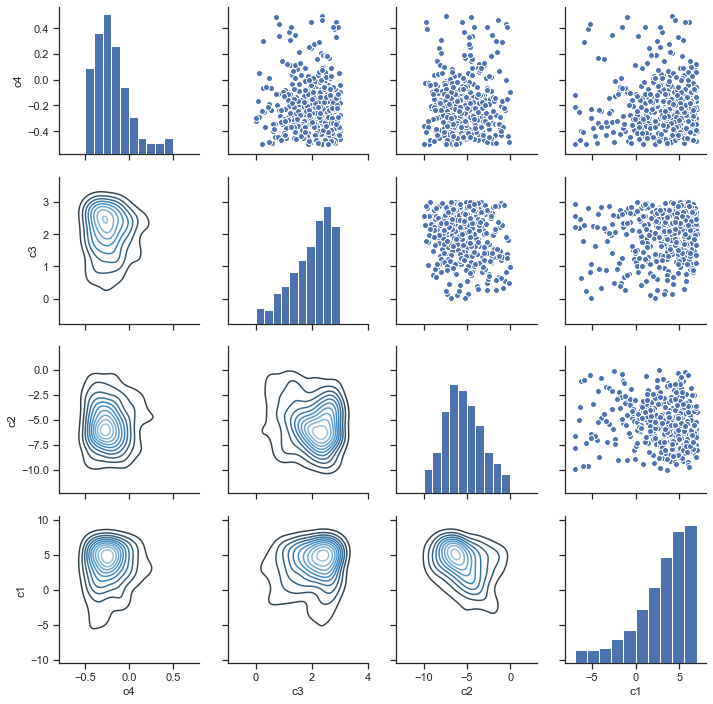

In [17]:
plot_results()

Ummm. Much better results. Now the curve generated by the external simulation program is closer to the behavior of experimental data. From the pair-plots, it can be seen how the Bayesian algorithm is choosing points closer to the proper values.

### Second tuning of the optimization parameters to get the final results

Now, for the second time, we can refine the domain by paying attention to the pair-plot and also the curves' behavior. This is indeed a good demonstration of what we talked about: how the curves can also help us. Have a look at the 3 generated curves (you can always increase the number of curves you want to see). Comparing the 1st and 3rd curves with the 2nd curves shows us the effect of $c_1$ and $c_2$, no? So, for tuning the search space, we should consider different aspects. It's not just averaging the values of the best runs or trying to cover the whole range. After changing the ranges, we run the optimization algorithm and then the postprocessor again.

In [18]:
ranges = {
    'c4': (-0.4, -0.2),
    'c3': (2, 3),
    'c2': (-7, -5.5),
    'c1': (5, 7)
}

run_optimization()

100%|████████████████████████████████████████████████| 400/400 [01:17<00:00,  5.14it/s, best loss: 0.08662878524450368]


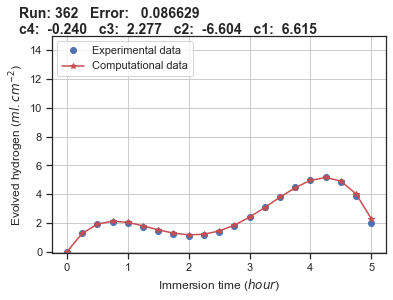

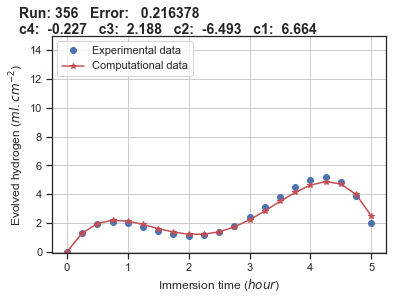

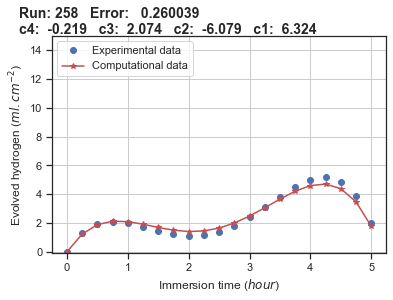

     Run        c4        c3        c2        c1     Error
292  362 -0.240452  2.276846 -6.603887  6.614911  0.086629
285  356 -0.227137  2.187729 -6.493190  6.664384  0.216378
176  258 -0.219344  2.073772 -6.078842  6.323509  0.260039
371   73 -0.221202  2.085417 -6.046601  6.254126  0.262760
136  221 -0.234449  2.220766 -6.362704  6.147860  0.268193
199  279 -0.239878  2.193334 -6.104781  6.011409  0.288245
92   182 -0.216993  2.116074 -6.315531  6.439939  0.370121
181  262 -0.206111  2.000197 -5.982710  6.346189  0.390623
197  277 -0.211643  2.001066 -5.914959  6.304952  0.393464
52   146 -0.225711  2.118761 -6.080189  6.237653  0.456140


<Figure size 432x288 with 0 Axes>

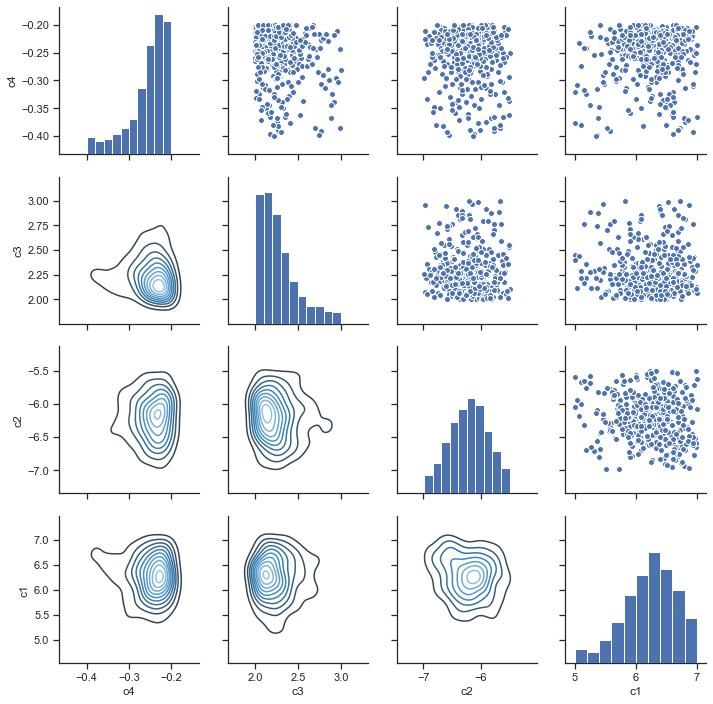

In [19]:
plot_results()

Wow, so close results. We captured the correct values. This time the results are so close to the experimental data, and the errors are relatively low. So, averaging the top 3 run (or just obtaining the first run as it's almost the same plot) leads to the final values of parameters we were seeking. Let's have a look at how accurate these values are. The estimated parameters are:

$$ c_4 = -0.24, c_3 = 2.28, c_2 = -6.60, c_1 = 6.61 $$

And as can we approximated the function by a simple interpolation technique, the correct values are:

$$ c_4 = -0.25, c_3 = 2.35, c_2 = -6.75, c_1 = 6.65 $$

Very nice. After 3 rounds of tuning, the approximated values are very close to the actual ones. If you need more accurate parameters for your specific application, you can continue the process by narrowing the search domain range and re-running the optimization algorithm. 

## Summary 

So, this is the end of the crash course. In this tiny learning module, you learned the basics of the following topics:

* Necessity of parameter estimation for computational models 
* What an inverse problem is and how it is related to mathematical optimization
* The typical workflow of an optimization problem in general and parameter estimation in specific
* How a parameter estimation procedure is implemented and how it should be fine-tuned

## Exercises

1- Generally speaking, as a note that requires attention, the starting point plays an important role in most optimization processes. It means that you may end up with completely different results by choosing a different initial point (the first guess with which you start the process). In `HyperOpt`, we don't have control over the starting point, but we can change how we randomly select it by modifying the random seed value. You can do that by changing `rstate= np.random.RandomState(55)` (choosing a different number for the seed) in the `run_optimization` function defined above. So, as an exercise to practice all the taken steps, change the seed number (which affects all the results) and try to find the optimal values again. This time, it may require more tuning steps to yield the correct values. Make sure you make correct decisions for tuning the search space in each step.

2- The external model we used in this notebook (the polynomial fitting problem) was cheap-to-evaluate, meaning that we were able to evaluate it very quickly since it required computing a polynomial function given a set of coefficients. The external model is not usually a cheap one in real-world applications, leading to a more expensive objective function. As a result, you may need to limit the number of iterations (which means the number of times you need to evaluate the objective function) in the optimization process. In an exercise, let's see the effect of the number of iterations on the output of the Bayesian optimization process. So, change the value of `max_evals=400` in the `run_optimization` function defined above and perform the optimization. You don't need to go till the end of the process. Just do it for a couple of steps to see where you go and if the number of iterations greatly impacts it. Change the number once again and check the results.

3- As described briefly in the text, we used the TPE algorithm of HyperOpt as the search algorithm in the optimization, but alternatively, we can use a "random" search. This algorithm makes the process more like a stochastic optimization, but it doesn't mean that we will get worse results. Let's see it in action and compare the performance. Change the algorithm to "random"
by `tpe_algo = random.suggest` in the `run_optimization` function and rerun the optimization. Then, compare the performance of this new search algorithm with the one we used initially.

## A mini-project

If you are interested to put these things into more practice, you can go trough this mini-project, the aim of which is to let you implement the parameter optimization process for another use case. First, try to take all the essential codes out of this Jupyter notebook file and make a clean code structure that replicates what we did here. You should be able to run the code and optimize our fitting test-case using Python. If you think this first step is a bit difficult, you can have a look at [this repository](https://github.com/mbarzegary/BayesianFEM), in which the same code is implemented ready-to-use for any problem. You may also need to set up a virtual environment to install the required packages, and you can find the instruction for doing that in the mentioned repository.

Then, as the main task in this mini-project, let's change the optimization problem to something else. For doing this, you should first modify the external Python program. I suggest that you find another type of problem in your field of study. All you need to find is a system (model) that accepts a set of parameters and returns an output. Then the goal is to tune the parameters such that the model produces a specific output (the reference). You may refer back to the very first paragraph of this notebook to recap the concept of parameter estimation in science and engineering. By having that in mind, you can find another calibration problem. After creating a new `external.py` code (which is indeed our model), you need to accordingly modify all the codes to make them compatible with the new model. You may need to change the parameters, domains, part of the postprocessing routine, and the objective function that calls the external model. Then, in the end, you can start to go through the optimization process to obtain the most optimal value of the parameters.

No worries if you cannot find any relevant problem to replace the fitting problem. In that case, you can simply change the fitting problem to something more complex than a simple polynomial. As you can see in the source code of the external model, the current polynomial model is constructed using the `poly1d` function of Numpy (`func = np.poly1d(coefs)`). Thus, the goal can be changing it to a more complex form of functions like a trigonometric or exponential one. By doing this, you still need to change certain parts of the optimization code, but the changes will be relatively minor. Then, start to calibrate the coefficients using the approach you learned here.